In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from walker import Walker, plot_trajectory

# 1. Implement a 'from_json' factory method
You can use the snippet 
```
with open(path, 'r') as f:
    inputs = json.load(f)
```
to open and read a json file. Next, the method should return an instance populated with the information in the json file.

In [2]:
walker = Walker.from_json("inputs.json")

Just for fun, we can make sure that the walker still works as expected

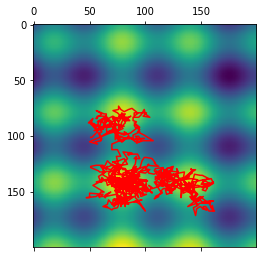

In [3]:
# Sample a next step 1000 times
i, j = 100, 50
trajectory = []
for _ in range(1000):
    i, j = walker.sample_next_step(i, j)
    trajectory.append((i, j))
plot_trajectory(trajectory, walker.context_map)

# 2. Implement a 'to_json' method
Json files are typically written by specifying a dictionary like in the following snippet 
```
with open(json_path, 'w') as f:
    json.dump(serialize_dict, f)
```
For now serialize only the attributes "sigma_i", "sigma_j", and "size". Generate your json file and open it to see, if it worked. What kind of name should the file have?

In [4]:
walker_path = walker.to_json()

Walker serialized to walker_20220820-160254.json


# Is it possible to serialize and re-instantiate the instance using your code?

Think about the context map generation. You may want to use `np.save` to save the context map as a matrix, rather than saving the function or function name. If you decide to go this route, make sure to keep track of where that npy file is being saved to. Can you 

In [5]:
walker_reloaded = Walker.from_json(walker_path)

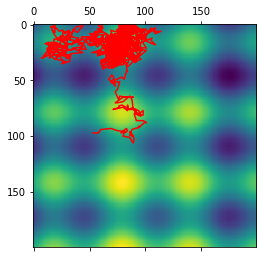

In [6]:
# Sample a next step 1000 times
i, j = 100, 50
trajectory = []
for _ in range(1000):
    i, j = walker_reloaded.sample_next_step(i, j)
    trajectory.append((i, j))
plot_trajectory(trajectory, walker_reloaded.context_map)